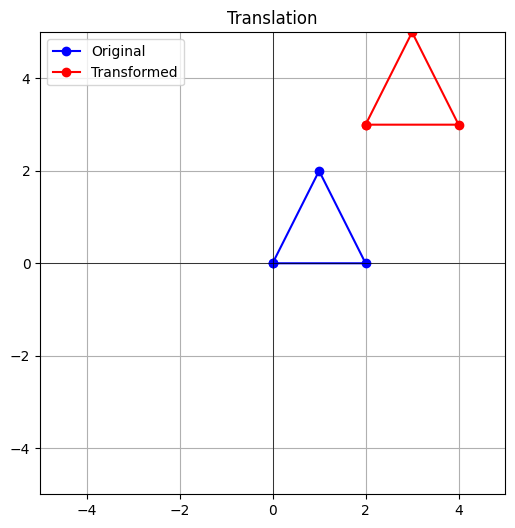

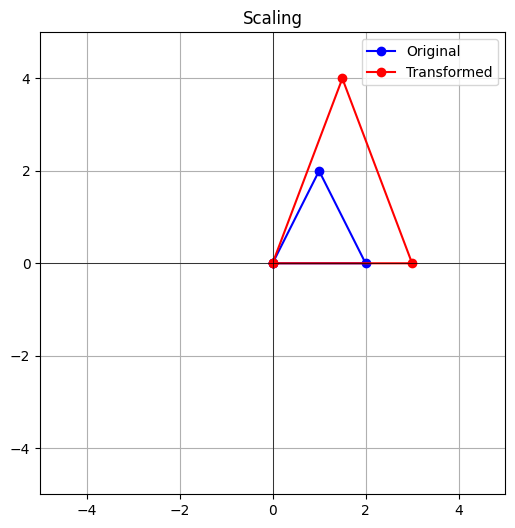

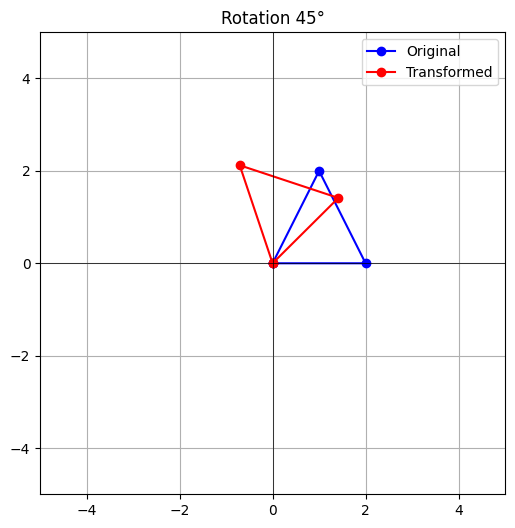

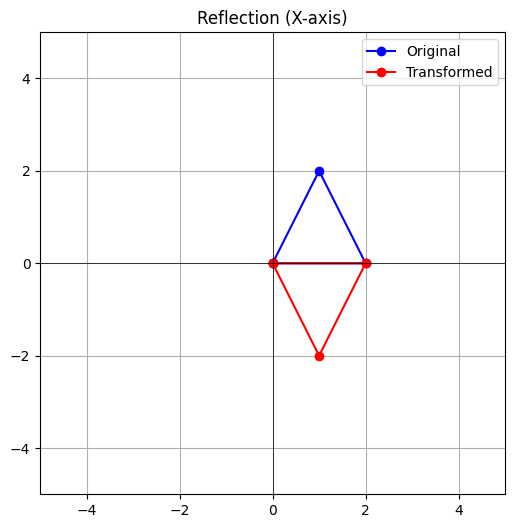

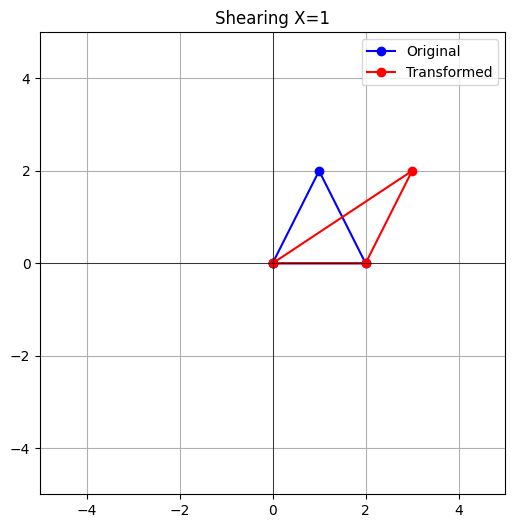

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define a sample 2D object (triangle)
object_points = np.array([[0, 0], [1, 2], [2, 0], [0, 0]])  # Triangle

def plot_object(original, transformed, title):
    plt.figure(figsize=(6, 6))
    plt.plot(original[:, 0], original[:, 1], 'bo-', label='Original')
    plt.plot(transformed[:, 0], transformed[:, 1], 'ro-', label='Transformed')
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.legend()
    plt.title(title)
    plt.grid()
    plt.show()

# Translation
def translate(points, tx, ty):
    translation_matrix = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
    ones = np.ones((points.shape[0], 1))
    transformed_points = np.dot(translation_matrix, np.hstack([points, ones]).T).T[:, :2]
    plot_object(points, transformed_points, "Translation")
    return transformed_points

# Scaling
def scale(points, sx, sy):
    scaling_matrix = np.array([[sx, 0], [0, sy]])
    transformed_points = np.dot(points, scaling_matrix.T)
    plot_object(points, transformed_points, "Scaling")
    return transformed_points

# Rotation
def rotate(points, angle):
    theta = np.radians(angle)
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    transformed_points = np.dot(points, rotation_matrix.T)
    plot_object(points, transformed_points, f"Rotation {angle}°")
    return transformed_points

# Reflection (about x-axis)
def reflect(points):
    reflection_matrix = np.array([[1, 0], [0, -1]])
    transformed_points = np.dot(points, reflection_matrix.T)
    plot_object(points, transformed_points, "Reflection (X-axis)")
    return transformed_points

# Shearing (in X direction)
def shear_x(points, shear_factor):
    shear_matrix = np.array([[1, shear_factor], [0, 1]])
    transformed_points = np.dot(points, shear_matrix.T)
    plot_object(points, transformed_points, f"Shearing X={shear_factor}")
    return transformed_points

# Perform transformations
translated = translate(object_points, 2, 3)
scaled = scale(object_points, 1.5, 2)
rotated = rotate(object_points, 45)
reflected = reflect(object_points)
sheared = shear_x(object_points, 1)


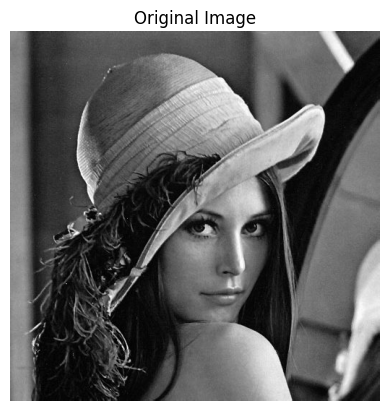

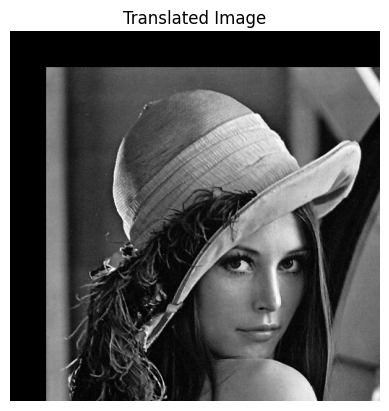

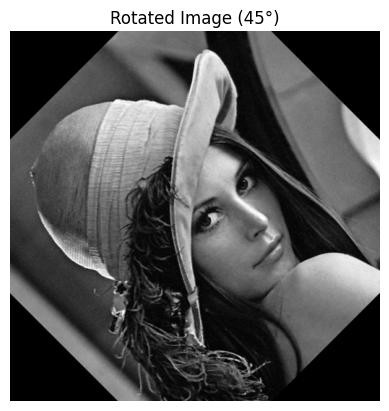

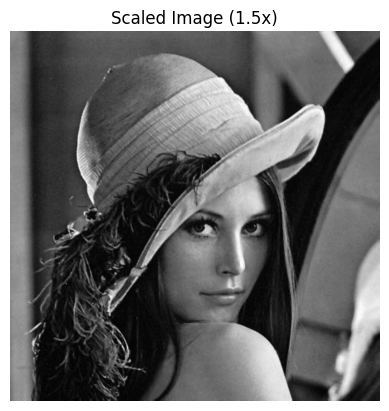

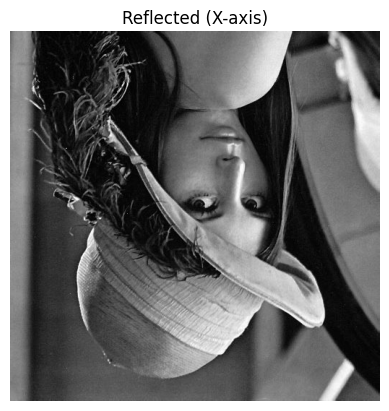

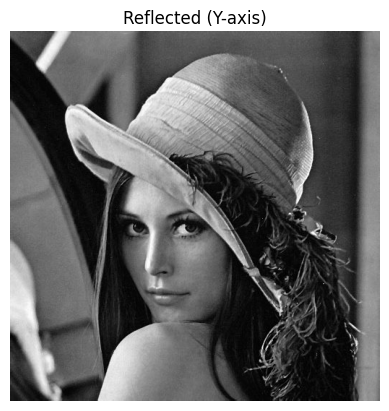

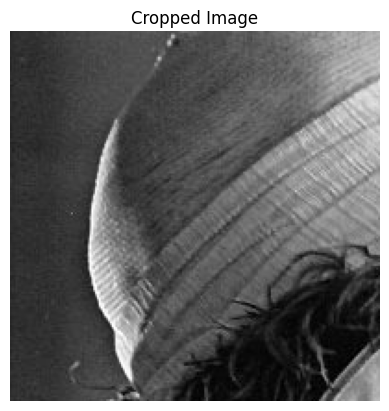

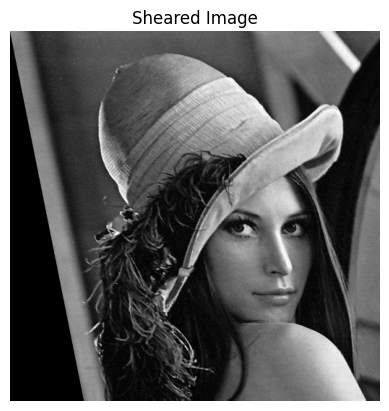

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Could not load image.")
        return None
    return image

def display_image(image, title):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

def translate_image(image, tx, ty):
    h, w = image.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated = cv2.warpAffine(image, translation_matrix, (w, h))
    return translated

def rotate_image(image, angle):
    h, w = image.shape[:2]
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, rotation_matrix, (w, h))
    return rotated

def scale_image(image, scale_x, scale_y):
    scaled = cv2.resize(image, None, fx=scale_x, fy=scale_y, interpolation=cv2.INTER_LINEAR)
    return scaled

def reflect_image(image, axis):
    if axis == 'x':
        return cv2.flip(image, 0)
    elif axis == 'y':
        return cv2.flip(image, 1)

def crop_image(image, x, y, w, h):
    return image[y:y+h, x:x+w]

def shear_image(image, shear_x, shear_y):
    h, w = image.shape[:2]
    shear_matrix = np.float32([[1, shear_x, 0], [shear_y, 1, 0]])
    sheared = cv2.warpAffine(image, shear_matrix, (w, h))
    return sheared

# Load image
image_path = '/content/girl.jpg'  # Change this to your actual image path
image = load_image(image_path)

if image is not None:
    # Apply transformations
    translated = translate_image(image, 50, 50)
    rotated = rotate_image(image, 45)
    scaled = scale_image(image, 1.5, 1.5)
    reflected_x = reflect_image(image, 'x')
    reflected_y = reflect_image(image, 'y')
    cropped = crop_image(image, 50, 50, 200, 200)
    sheared = shear_image(image, 0.2, 0)

    # Display results
    display_image(image, "Original Image")
    display_image(translated, "Translated Image")
    display_image(rotated, "Rotated Image (45°)")
    display_image(scaled, "Scaled Image (1.5x)")
    display_image(reflected_x, "Reflected (X-axis)")
    display_image(reflected_y, "Reflected (Y-axis)")
    display_image(cropped, "Cropped Image")
    display_image(sheared, "Sheared Image")
